# A2 - Validación de un Modelo de Regresión Lineal Múltiple

## Instrucciones:
Para el dataset de "auto-mpg.csv" (disponible en en apartado DATASETS del tema) generar un modelo de regresión lineal múltiple que permita predecir el desempeño en millas por galón (mpg) de algún vehículo, utilizando como variables predictoras cylinders, displacement, horsepower, weight, y acceleration, y validar el modelo generado siguiendo los siguientes criterios:

1. Para este ejercicio, deberá particionar el dataset en dos conjuntos (Conjunto de Entrenamiento y de Prueba). La delimitación de estos conjuntos deberá hacerse de manera que no exista sesgo en la elección de sus elementos.

2. Utilizar el conjunto de entrenamiento generado para construir el modelo de regresión lineal, tomando nota de los parámetros obtenidos y del valor del coeficiente de determinación (R^2)

3. Para hacer la validación del modelo deberá utilizar el conjunto delimitado como datos de prueba, y deberá aplicar la métrica del Error Estándar Residual (RSE) para evaluarlo.

4. Finalmente deberá responder las siguientes preguntas:

- ¿Qué tan buena es la bondad de ajuste de su modelo de regresión respecto al conjunto de datos de entrenamiento que delimitó?
- ¿Qué tan buenas son las predicciones generadas por su modelo de acuerdo a las métricas aplicada para evaluarlo?
- De entre las variables utilizadas ¿Cuáles son las tres más importantes para el modelo de regresión propuesto?

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [201]:
df = pd.read_csv("../../datasets/auto/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [202]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
df["mpg"] = df["mpg"].fillna(df["mpg"].mean())

Text(0.5, 1.0, 'HP vs MPG')

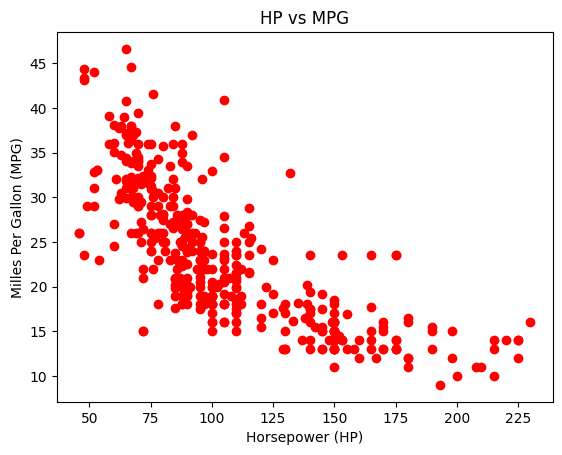

In [203]:
%matplotlib inline
plt.plot(df["horsepower"], df["mpg"], "ro")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Milles Per Gallon (MPG)")
plt.title("HP vs MPG")

## Dividir el dataset en train y test

In [204]:
df_train, df_test= train_test_split(df,test_size=0.3)

In [205]:
X_train = df_train[["cylinders", "displacement", "horsepower", "weight", "acceleration"]]
Y_train = df_train["mpg"]

X_test = df_test[["cylinders", "displacement", "horsepower", "weight", "acceleration"]]
Y_test = df_test["mpg"]

In [206]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((284, 5), (284,), (122, 5), (122,))

## Aplicando Regresión Lineal con las variables seleccionadas

In [207]:
# Función para evaluacion del modelo
def val_model(model: LinearRegression, x, y):
    preds = model.predict(x)
    SSD = np.sum((y-preds)**2)
    RSE = np.sqrt(SSD/(len(x)-1))
    # Calcular RSE_%
    y_mean = np.mean(y)
    RSE_rate = RSE/y_mean
    print("Score = ",model.score(x,y))
    print("SSD = ",SSD)
    print("RSE = ",RSE)
    print("RSE_% = ",RSE_rate)
    return preds

In [208]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Bondad de ajuste del modelo (Train y Test)

In [209]:
print("Train:")
preds_train = val_model(lm, X_train, Y_train)
print("\nTest:")
preds_test = val_model(lm, X_test, Y_test)

Train:
Score =  0.6691970074322099
SSD =  5354.961625237707
RSE =  4.349956997975058
RSE_% =  0.183855025113862

Test:
Score =  0.7190256730691313
SSD =  2260.4102596937773
RSE =  4.322161094452039
RSE_% =  0.18648727954300934


Text(0.5, 1.0, 'Datos de Train')

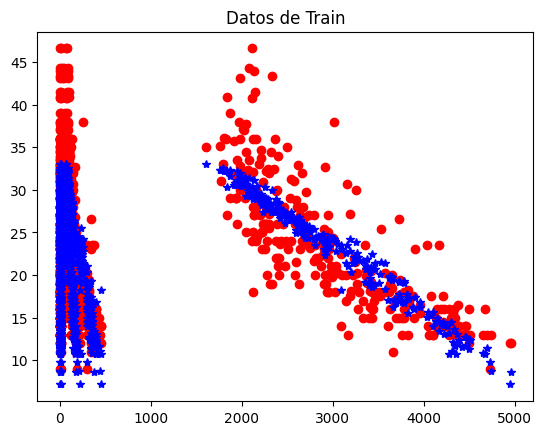

In [210]:
plt.plot(X_train, Y_train, "ro")
plt.plot(X_train, preds_train, "b*")
plt.title("Datos de Train")

Text(0.5, 1.0, 'Datos de Test')

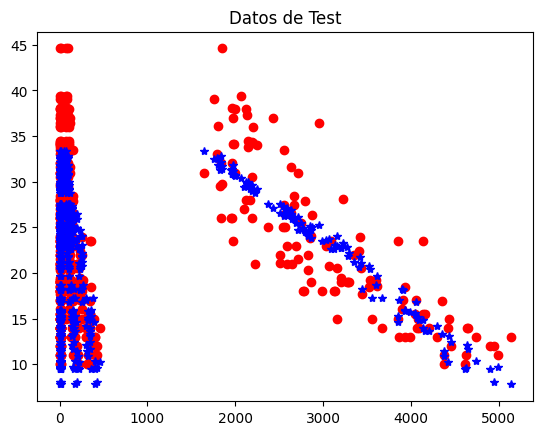

In [211]:
plt.plot(X_test, Y_test, "ro")
plt.plot(X_test, preds_test, "b*")
plt.title("Datos de Test")

## Matriz de correlación para selección de variables

In [212]:
df[["cylinders", "displacement", "horsepower", "weight", "acceleration", "mpg"]].corr()

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.951787,0.840140,0.895220,-0.522452,-0.762698
displacement,0.951787,1.000000,0.894719,0.932475,-0.557984,-0.791268
horsepower,0.840140,0.894719,1.000000,0.862617,-0.692274,-0.758059
weight,0.895220,0.932475,0.862617,1.000000,-0.430086,-0.823327
acceleration,-0.522452,-0.557984,-0.692274,-0.430086,1.000000,0.409338
mpg,-0.762698,-0.791268,-0.758059,-0.823327,0.409338,1.000000


In [213]:
columns = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]

In [214]:
# Prueba de modelo columna por columna
for col in columns:
    X = X_train[[col]]
    Y = Y_train
    lm = LinearRegression()
    lm.fit(X,Y)
    score = lm.score(X,Y)
    print(f"Using only {col}, R^2: {score}")

Using only cylinders, R^2: 0.5558232838301183
Using only displacement, R^2: 0.5998296213860652
Using only horsepower, R^2: 0.5609081793341123
Using only weight, R^2: 0.6557301731690444
Using only acceleration, R^2: 0.20379850227631602


## Probando solo con Cylinders, Displacement y Weight

In [215]:
X_train = df_train[["cylinders", "displacement", "weight"]]
Y_train = df_train["mpg"]

X_test = df_test[["cylinders", "displacement", "weight"]]
Y_test = df_test["mpg"]

In [216]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [217]:
print("Train:")
_ = val_model(lm, X_train, Y_train)
print("\nTest:")
_ = val_model(lm, X_test, Y_test)

Train:
Score =  0.6592173533430529
SSD =  5516.509936109263
RSE =  4.415084141000887
RSE_% =  0.186607685087784

Test:
Score =  0.7268860865622098
SSD =  2197.1740220656993
RSE =  4.261274808350021
RSE_% =  0.1838602331168089


## Respuesta a las preguntas

- **¿Qué tan buena es la bondad de ajuste de su modelo de regresión respecto al conjunto de datos de entrenamiento que delimitó?**

Al utilizar todas las columnas indicadas para el modelo, se llegó a una bondad de ajuste del 66.9% y un RSE de 0.18 utilizando solamente los datos de train. Estos resultados son bastante similares a los obtenidos por el modelo de regresion cuadratica unicamente utilizando la variable "horsepower" (Notebook 1.8).

- **¿Qué tan buenas son las predicciones generadas por su modelo de acuerdo a las métricas aplicada para evaluarlo?**

Las predicciones generadas por el modelo en el caso del conjunto de datos de test son bastante buenas, ya que se obtuvo un RSE de 0.18 y una bondad de ajuste del 71.9%. Estos resultados son mejores que los obtenidos con el conjunto de datos de train.


- **De entre las variables utilizadas ¿Cuáles son las tres más importantes para el modelo de regresión propuesto?**

Despues de analizar la matriz de correlación y haber probado el modelo columna por columna, se puede ver que las variables que tienen mas impacto en el modelo son "weight", "displacement" y "cylinders" en ese respectivo orden.
Al probar el modelo con estas tres variables en conjunto se obtuvo un RSE de 0.18 y una bondad de ajuste del 72.6% para el caso del conjunto de datos de test, indicando que con estas 3 variables se puede obtener un modelo igual o mejor que utilizando las 5 variables iniciales.